In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# The statistical module used to run chi square test
import scipy.stats as stats
csv1 = "Data/Behavioral_Risk_2011_clean.csv"

csv2 = "Data/CDC_STATE_System_E-Cigarette_Legislation_-_Tax.csv"

usage_df = pd.read_csv(csv1)
legis_df = pd.read_csv(csv2)
#usage_df.head()
legis_df.head()

,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,...,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID
0,2016,2,VI,U.S. Virgin Islands,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Percent Value,45,...,NaN,3/23/2016,NaN,"(18.335765, -64.896335)",3,LEG,1040LEG,1001ETR,10GRP,452
1,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax,Yes,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",1,LEG,1040LEG,1001ETR,10GRP,450
2,2016,3,VI,U.S. Virgin Islands,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Percent Value,45,...,NaN,3/23/2016,NaN,"(18.335765, -64.896335)",3,LEG,1040LEG,1001ETR,10GRP,452
3,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,E-Cigarette Tax ($ each),0.01,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",2,LEG,1040LEG,1001ETR,10GRP,451
4,2019,4,OH,Ohio,Legislation - E-Cigarette - Tax,E-Cigarette,OSH,Restrictions,Type of Tax,Per vapor volume,...,NaN,7/18/2019,10/17/2019,"(40.06021014100048, -82.40426005599966)",4,LEG,1040LEG,1001ETR,10GRP,453


In [2]:
legis_drop_df = legis_df[legis_df.ProvisionValue !="No Provision"]
legis_count_df = legis_drop_df.groupby(['LocationAbbr']).agg({'ProvisionGroupDesc':'count'})
legis_count_df.head()

,ProvisionGroupDesc
LocationAbbr,
CA,42
CT,12
DC,60
DE,33
IL,15


In [3]:
usage_clean_df = usage_df

usage_clean_df = usage_clean_df[usage_clean_df.MeasureDesc !="Frequency of Use"]
usage_clean_df = usage_clean_df[usage_clean_df.Gender !="Overall"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Not Current"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Former"]
usage_clean_df = usage_clean_df[usage_clean_df.Response !="Never"]

usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cigarette Use_Adults"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Smokeless Tobacco Use (Adults)"]
usage_clean_df = usage_clean_df[usage_clean_df.TopicDesc !="Cessation (Adults)"]

usagebystate_df = usage_clean_df.groupby(['LocationAbbr']).agg({'Data_Value':['mean']})
usagebystate_df.head()

,Data_Value
,mean
LocationAbbr,
AK,16.238182
AL,18.632000
AR,20.080000
AZ,13.526000
CA,9.780000


In [4]:
combo_df = legis_count_df.merge(usagebystate_df, left_on='LocationAbbr', right_on='LocationAbbr')

combo_df.sort_values(by='ProvisionGroupDesc', ascending=False)

/Users/Samantha/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,ProvisionGroupDesc,"(Data_Value, mean)"
LocationAbbr,,
MN,123,13.434545
NC,66,15.260000
LA,63,18.501818
DC,60,13.490000
WV,51,23.570000
PA,51,16.966000
KS,45,16.046000
CA,42,9.780000
DE,33,14.847273


In [5]:
combo_df.nlargest(6, "ProvisionGroupDesc") 
#average of all perecent of current e-cig smokers by state (data_value_mean)

,ProvisionGroupDesc,"(Data_Value, mean)"
LocationAbbr,,
MN,123,13.434545
NC,66,15.260000
LA,63,18.501818
DC,60,13.490000
PA,51,16.966000
WV,51,23.570000


In [6]:
# Create the dataframe with top 6 states and their laws and percentage of current e-cig users
top_states = pd.DataFrame({'States':['MN', 'NC', 'LA', 'DC', 'PA', 'WV'], 
                    'Legislation':['123','66','63','60','51','51'], 
                           '% of E-Cig Users':['13.43','15.26','18.50','13.49','16.96','23.57']
                        
                          }) 
  
# Print the dataframe 
top_states

,States,Legislation,% of E-Cig Users
0,MN,123,13.43
1,NC,66,15.26
2,LA,63,18.50
3,DC,60,13.49
4,PA,51,16.96
5,WV,51,23.57


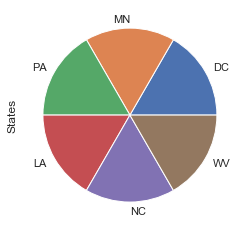

In [7]:
#pie plot to show all top 6 states 
top_states["States"].value_counts().plot.pie()

[123, 66, 63, 60, 51, 51]
['MN', 'NC', 'LA', 'DC', 'PA', 'WV']


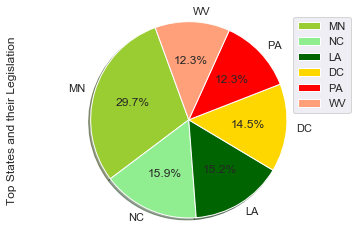

In [8]:
#pie plot to show top states and their current number of legislation (laws)
states = ['MN', 'NC', 'LA', 'DC', 'PA', 'WV']
state_laws = [123, 66, 63, 60, 51, 51]


sizes = state_laws
print(sizes)
labels = list(states)
# makeitastring = ''.join(map(str, labels))
print(labels)
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=110) 
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.legend()
plt.ylabel('Top States and their Legislation')
plt.show()

[13.43, 15.26, 18.5, 13.49, 16.96, 23.57]
['MN', 'NC', 'LA', 'DC', 'PA', 'WV']


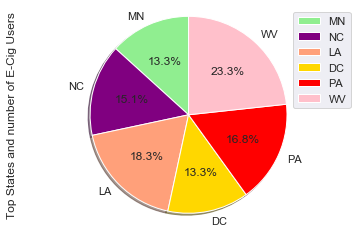

In [9]:
#pie plot to show top states and their current number of curent e-cig users 
states = ['MN', 'NC', 'LA', 'DC', 'PA', 'WV']
Percent_of_ecig_users = [13.43, 15.26, 18.50, 13.49, 16.96, 23.57]


sizes = Percent_of_ecig_users
print(sizes)
labels = list(states)
# makeitastring = ''.join(map(str, labels))
print(labels)
colors = ['lightgreen', 'purple', 'lightsalmon', 'gold', 'red', 'pink', 'darkred']
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
#plt.pie(sizes, labels, colors)
plt.axis('equal')
plt.legend()
plt.ylabel('Top States and number of E-Cig Users')
plt.show()

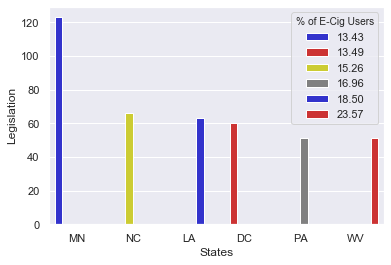

In [10]:
# created a multi-group bar plot in Seaborn
ax = sns.barplot(
        data=top_states,
        x="States",
        y="Legislation",
        hue="% of E-Cig Users",
        palette=['blue', 'red', 'yellow', 'grey'],
        saturation=0.6,
    )

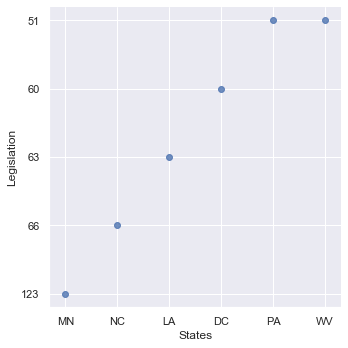

In [11]:
sns.lmplot('States', 'Legislation', data = top_states, fit_reg=False)

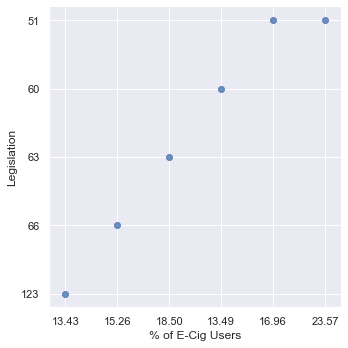

In [12]:
sns.lmplot('% of E-Cig Users', 'Legislation', data = top_states, fit_reg=False)

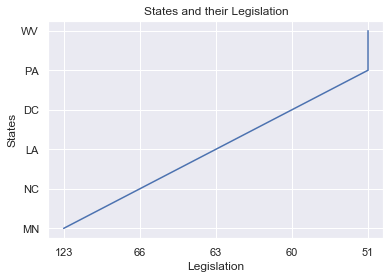

In [13]:
plt.plot(top_states['Legislation'], top_states['States'])
plt.xlabel('Legislation')
plt.ylabel('States')
plt.title('States and their Legislation')
plt.show()

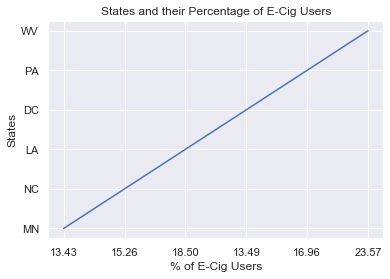

In [14]:
plt.plot(top_states['% of E-Cig Users'], top_states['States'])
plt.xlabel('% of E-Cig Users')
plt.ylabel('States')
plt.title('States and their Percentage of E-Cig Users')
plt.show()

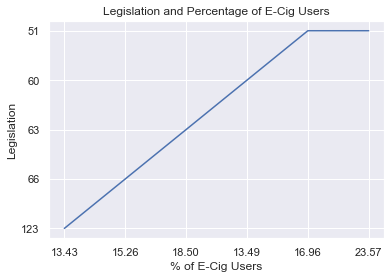

In [15]:
plt.plot(top_states['% of E-Cig Users'], top_states['Legislation'])
plt.xlabel('% of E-Cig Users')
plt.ylabel('Legislation')
plt.title('Legislation and Percentage of E-Cig Users')
plt.show()

In [23]:
top_states.groupby('States').hist().plot()


ValueError: hist method requires numerical columns, nothing to plot.